<a href="https://colab.research.google.com/github/zahrael97/COVID-19-detection-using-deep-Learning/blob/master/VGG/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# resize all the images to this
IMAGE_SIZE = [224,224]
train_path = "/content/drive/My Drive/Dataset_Zahra/train"
test_path = "/content/drive/My Drive/Dataset_Zahra/test"

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

80142336/80134624 [==============================] - 6s 0us/step


In [0]:
  # useful for getting number of classes
folders = glob('/content/drive/My Drive/Dataset_Zahra/train/*')

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset_Zahra/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Dataset_Zahra/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 312 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
10/10 [==============================] - 231s 23s/step - loss: 0.4494 - accuracy: 0.7853 - val_loss: 0.0575 - val_accuracy: 0.9754
Epoch 2/30
10/10 [==============================] - 16s 2s/step - loss: 0.0697 - accuracy: 0.9840 - val_loss: 0.0036 - val_accuracy: 0.9836
Epoch 3/30
10/10 [==============================] - 17s 2s/step - loss: 0.0634 - accuracy: 0.9808 - val_loss: 0.0115 - val_accuracy: 0.9836
Epoch 4/30
10/10 [==============================] - 17s 2s/step - loss: 0.0816 - accuracy: 0.9712 - val_loss: 0.0868 - val_accuracy: 0.9836
Epoch 5/30
10/10 [==============================] - 17s 2s/step - loss: 0.0301 - accuracy: 0.9936 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - 17s 2s/step - loss: 0.0167 - accuracy: 0.9936 - val_loss: 0.0039 - val_accuracy: 0.9836
Epoch 7/30
10/10 [==============================] - 17s 2s/step - loss: 0.0222 - accuracy: 0.9904 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 8/30
10/10 [

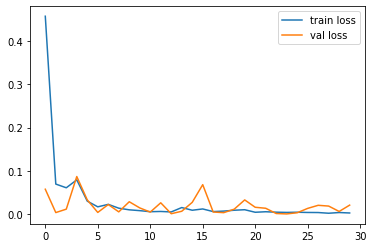

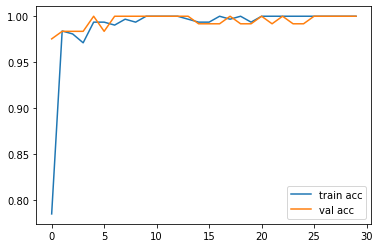

<Figure size 432x288 with 0 Axes>

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('VGG19.h5')

In [17]:
y_pred = model.predict_generator(test_set, steps=len(test_set), verbose=1)
y_pred = y_pred.argmax(axis=-1)
y_true = test_set.classes
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
precision = precision_score(y_true, y_pred) 
recall = recall_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 
confusion = confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)
print("-"*70)
print("Report")
print("-"*70)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("-"*70)
print("\n\n")

cls_report_print = classification_report(y_true, y_pred, target_names=['covid', 'Normal'])

cls_report = classification_report(y_true, y_pred, target_names=['covid', 'Normal'], output_dict=True)

print("-"*70)
print("covid Prediction")
print("-"*70)
print(cls_report_print)
print("-"*70)

print("confusion matrix    :" , confusion)

4/4 [==============================] - 4s 984ms/step
----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Precision     : 43.55%
Recall        : 43.55%
F1-Score      : 43.55%
----------------------------------------------------------------------



----------------------------------------------------------------------
covid Prediction
----------------------------------------------------------------------
              precision    recall  f1-score   support

       covid       0.42      0.42      0.42        60
      Normal       0.44      0.44      0.44        62

    accuracy                           0.43       122
   macro avg       0.43      0.43      0.43       122
weighted avg       0.43      0.43      0.43       122

----------------------------------------------------------------------
confusion matrix    : [[25 35]
 [35 27]]
